In [63]:
import os
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [90]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\n99% accuracy achieved, ending training....")
            self.model.stop_training = True

callbacks=myCallback()
#CNN MODEL:
model=tf.keras.models.Sequential([
    #first convolution:
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flaten to DNN
    tf.keras.layers.Flatten(),
    #hidden layer with 512 neurons
    tf.keras.layers.Dense(512,activation='relu'),
    #output 1 neuron= 0(happy) or 1(sad)
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 9248)            

In [91]:
train_data_gen=ImageDataGenerator(rescale=1/255)
train_generator=train_data_gen.flow_from_directory(
    #source
    '/Users/aryanpillai/PycharmProjects/Happy_or_Sad/happy_or_sad',
    target_size=(150,150),
    batch_size=10,
    class_mode='binary')
history=model.fit(train_generator,
                  steps_per_epoch=8,
                  epochs=15,
                  verbose=1,
                  callbacks=[callbacks])

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 2s 117ms/step - loss: 2.2861 - accuracy: 0.4196
Epoch 2/15
8/8 [==============================] - 1s 126ms/step - loss: 0.5980 - accuracy: 0.8080

Input Image:


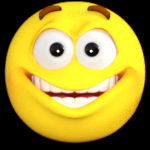

In [131]:
img=image.load_img('/Users/aryanpillai/PycharmProjects/Happy_or_Sad/validation/happy_val.png'
                   ,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
print("Input Image:")
img

In [132]:
#To predict image:
classes=model.predict(x)
if classes>0.5:
    print("Image is Sad")
else:
    print("Image is Happy")

Image is Happy


Input Image:


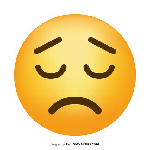

In [133]:
img=image.load_img('/Users/aryanpillai/PycharmProjects/Happy_or_Sad/validation/sad_val.jpeg'
                   ,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
print("Input Image:")
img

In [134]:
#To predict image:
classes=model.predict(x)
if classes>0.5:
    print("Image is a Sad")
else:
    print("Image is a Happy")

Image is a Sad
